In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:

# Chỉ định mã hóa chính xác (ví dụ: 'latin1') khi đọc tệp CSV
all_data_cleaned = pd.read_csv('data_2024_final.csv')

# Hiển thị DataFrame
all_data_cleaned

,DATE,YEAR,MONTH,DAY,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,T2M,T2MDEW,...,WS2M_MIN,WS2M_RANGE,WD2M,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,GWETTOP,TS_1_DAY_AFTER
0,2000-01-01,2000,1,1,10.020000,12.74000,24.900000,58.100000,18.44,16.31,...,0.58,0.77,103.75,1.54,2.78,0.81,1.97,103.88,0.700000,18.09
1,2000-01-02,2000,1,2,11.610000,13.31000,24.940000,67.200000,18.40,15.85,...,0.41,1.52,94.69,1.92,2.53,0.66,1.87,94.81,0.700000,17.78
2,2000-01-03,2000,1,3,15.350000,16.13000,25.000000,86.600000,18.08,15.08,...,0.17,2.12,178.38,2.04,3.21,0.22,3.00,178.50,0.700000,18.77
3,2000-01-04,2000,1,4,7.720000,9.92000,25.060000,44.800000,18.84,17.00,...,0.77,2.92,161.62,3.16,5.21,1.44,3.78,161.12,0.700000,20.99
4,2000-01-05,2000,1,5,11.030000,11.76000,25.120000,63.300000,20.69,18.66,...,0.80,2.64,150.00,2.80,5.08,0.99,4.09,150.38,0.700000,21.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34950,2024-06-02,2024,6,2,21.170000,21.33752,39.610000,74.028704,29.73,26.36,...,0.24,2.02,164.62,2.05,3.52,0.30,3.22,164.75,0.708686,29.90
34951,2024-06-03,2024,6,3,20.970000,21.33752,39.620000,74.028704,29.77,26.07,...,0.33,1.12,218.19,1.67,2.26,0.52,1.73,219.12,0.708686,29.52
34952,2024-06-04,2024,6,4,14.420000,21.33752,39.630000,74.028704,29.42,26.80,...,0.30,1.12,83.00,1.44,2.32,0.59,1.73,83.06,0.708686,27.69
34953,2024-06-05,2024,6,5,13.475334,21.33752,33.640511,74.028704,27.80,26.14,...,0.84,2.73,69.25,3.20,5.08,1.63,3.44,69.56,0.708686,25.83


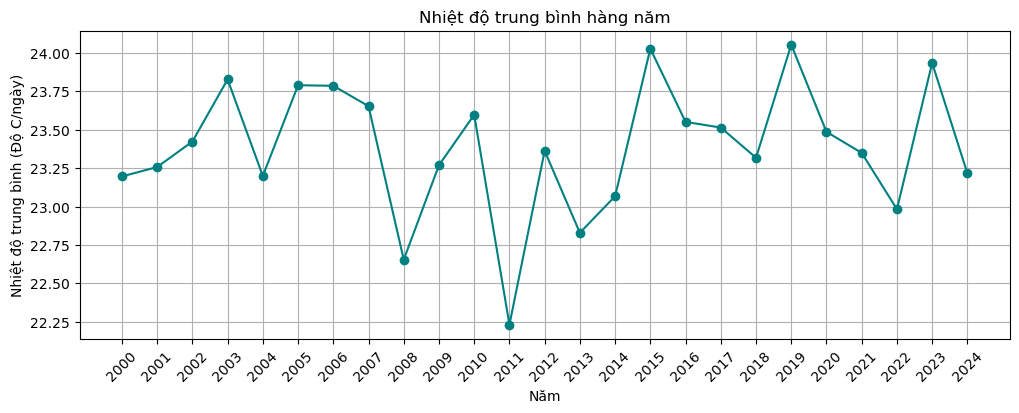

In [19]:
# Group dữ liệu theo năm và tính tổng Nhiệt độ cho mỗi năm
rainfall_by_year = all_data_cleaned.groupby('YEAR')['TS'].sum()

# Group dữ liệu theo năm và tính lượng ngày quan sát được mưa
observed_days_by_year = all_data_cleaned.groupby('YEAR')['TS'].count()

# Tính Nhiệt độ trung bình cho mỗi năm
average_rainfall_by_year = rainfall_by_year / observed_days_by_year

# Tạo biểu đồ đường
plt.figure(figsize=(12, 4))
plt.plot(average_rainfall_by_year.index, average_rainfall_by_year, marker='o', linestyle='-', color='teal')
plt.xlabel('Năm')
plt.ylabel('Nhiệt độ trung bình (Độ C/ngày)')
plt.title('Nhiệt độ trung bình hàng năm')
plt.grid(True)
# Sử dụng tất cả các năm trên trục x
plt.xticks(average_rainfall_by_year.index, rotation=45)
# Hiển thị biểu đồ
plt.show()


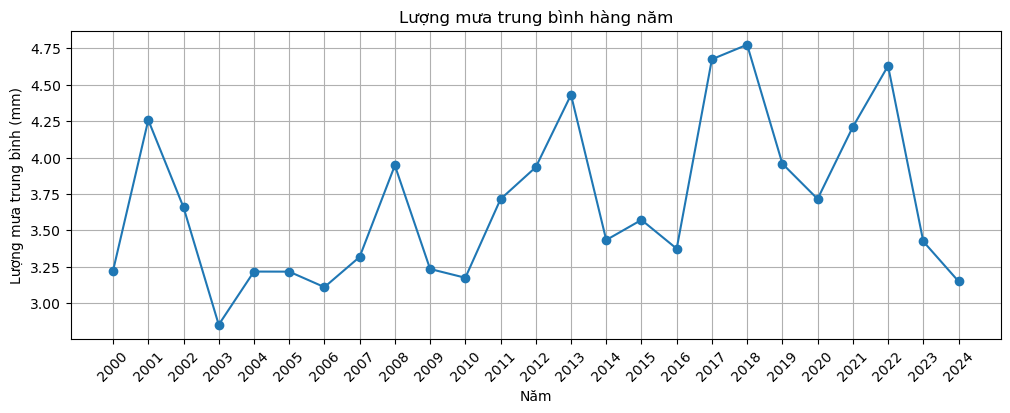

In [20]:
# Group dữ liệu theo năm và tính tổng Nhiệt độ cho mỗi năm
rainfall_by_year = all_data_cleaned.groupby('YEAR')['PRECTOTCORR'].sum()

# Group dữ liệu theo năm và tính lượng ngày quan sát được mưa
observed_days_by_year = all_data_cleaned.groupby('YEAR')['PRECTOTCORR'].count()

# Tính Nhiệt độ trung bình cho mỗi năm
average_rainfall_by_year = rainfall_by_year / observed_days_by_year

# Tạo biểu đồ đường
plt.figure(figsize=(12, 4))
plt.plot(average_rainfall_by_year.index, average_rainfall_by_year, marker='o', linestyle='-')
plt.xlabel('Năm')
plt.ylabel('Lượng mưa trung bình (mm)')
plt.title('Lượng mưa trung bình hàng năm')
plt.grid(True)
# Sử dụng tất cả các năm trên trục x
plt.xticks(average_rainfall_by_year.index, rotation=45)
# Hiển thị biểu đồ
plt.show()


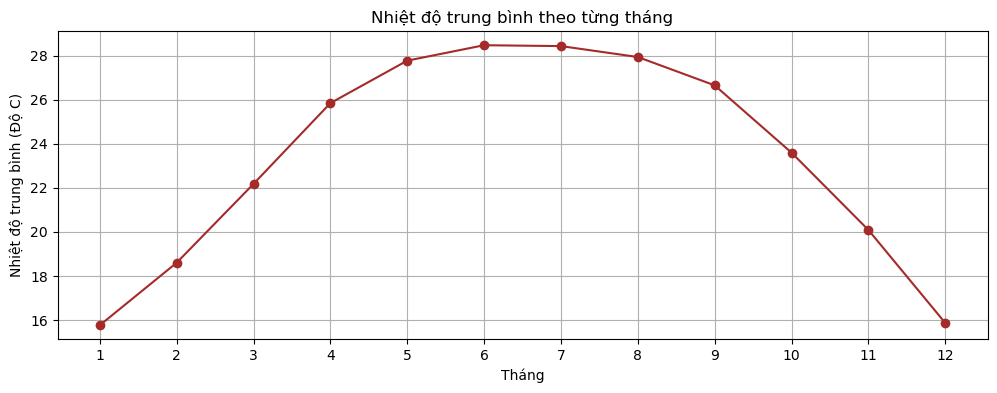

In [21]:
# Group dữ liệu theo tháng và tính Nhiệt độ trung bình cho từng tháng
rainfall_by_month = all_data_cleaned.groupby('MONTH')['TS'].mean()

# Tạo biểu đồ đường
plt.figure(figsize=(12, 4))
plt.plot(rainfall_by_month.index, rainfall_by_month, marker='o', linestyle='-',color = 'brown')
plt.xlabel('Tháng')
plt.ylabel('Nhiệt độ trung bình (Độ C)')
plt.title('Nhiệt độ trung bình theo từng tháng')
plt.grid(True)
# Sử dụng tất cả các năm trên trục x
plt.xticks(rainfall_by_month.index)
# Hiển thị biểu đồ
plt.show()

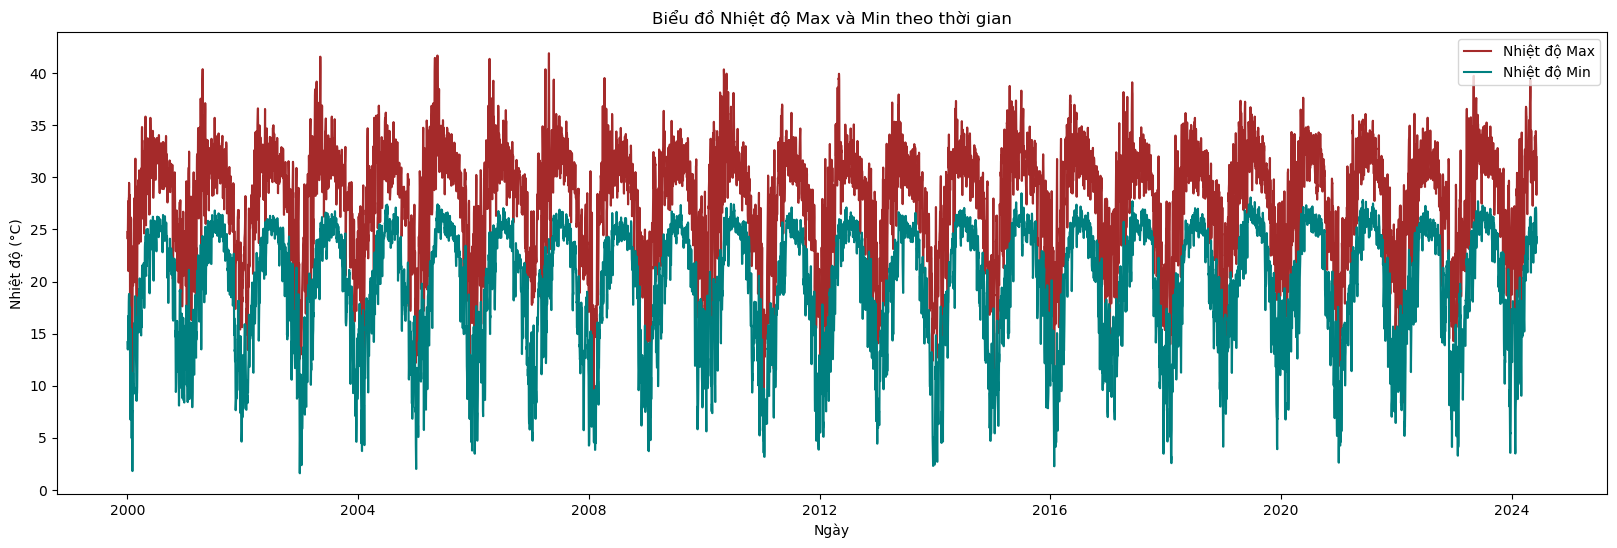

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Chuyển đổi cột 'DATE' sang định dạng datetime
all_data_cleaned['DATE'] = pd.to_datetime(all_data_cleaned['DATE'])

# Tạo biểu đồ đường cho T2M_MAX và T2M_MIN
plt.figure(figsize=(20, 6))
sns.lineplot(x='DATE', y='T2M_MAX', data=all_data_cleaned, label='Nhiệt độ Max', color='brown')
sns.lineplot(x='DATE', y='T2M_MIN', data=all_data_cleaned, label='Nhiệt độ Min', color='teal')

plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ (°C)')
plt.title('Biểu đồ Nhiệt độ Max và Min theo thời gian')
plt.legend()
plt.show()


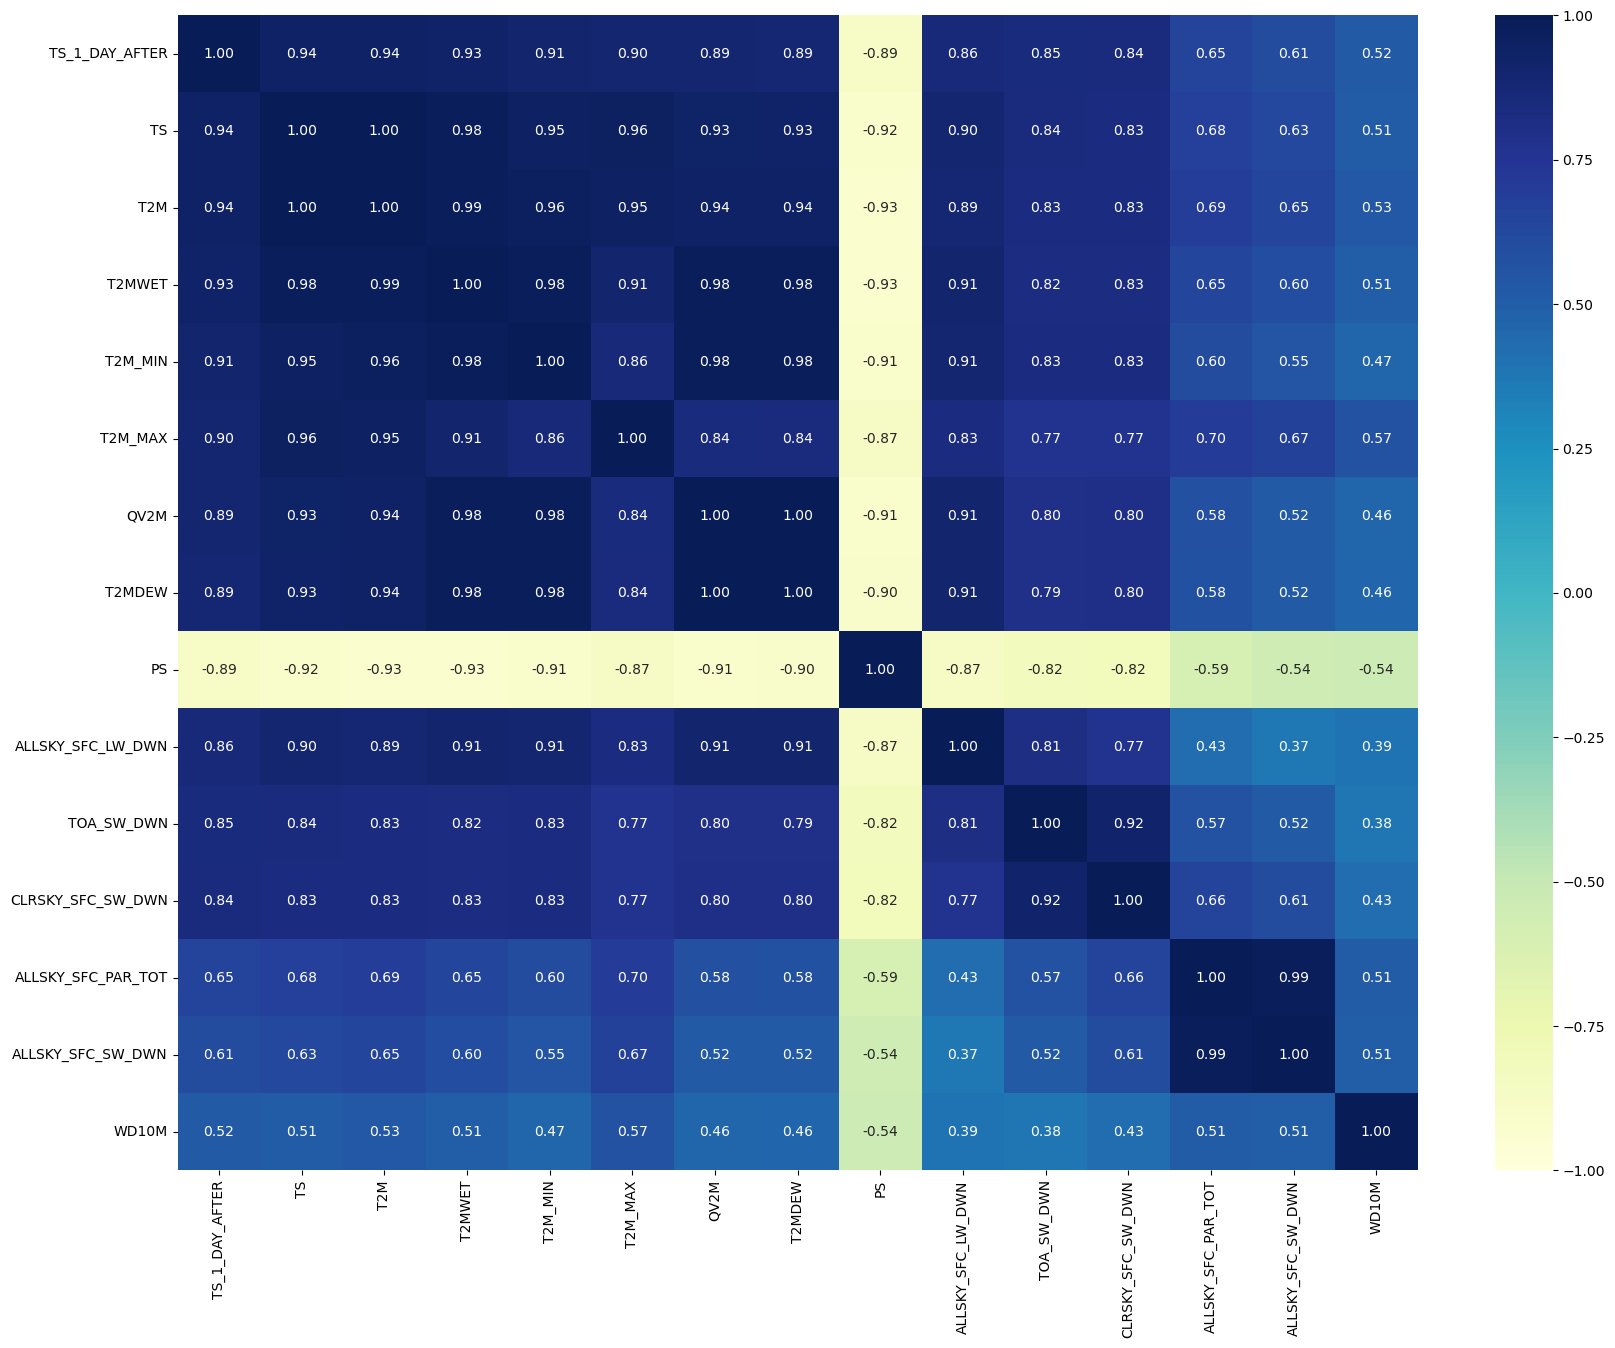

In [23]:
# Chọn số lượng biến bạn muốn
top_n = 15
# Tính ma trận tương quan cho toàn bộ DataFrame
correlation_matrix = all_data_cleaned.corr(method='spearman')
# Tính tương quan giữa biến mục tiêu và tất cả các biến khác
correlation_with_target = correlation_matrix['TS_1_DAY_AFTER'].abs()

# Sắp xếp giảm dần và chọn ra top_n biến
top_correlated_features = correlation_with_target.sort_values(ascending=False).head(top_n).index

# Lấy ma trận tương quan của top_n biến
top_correlation_matrix = all_data_cleaned[top_correlated_features].corr(method='spearman')

# Đặt kích thước của biểu đồ
plt.figure(figsize=(20, 15))

# Tạo biểu đồ heatmap với bảng màu 'viridis' và độ sáng giảm
sns.heatmap(top_correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", vmin=-1, vmax=1)

# Hiển thị biểu đồ
plt.show()


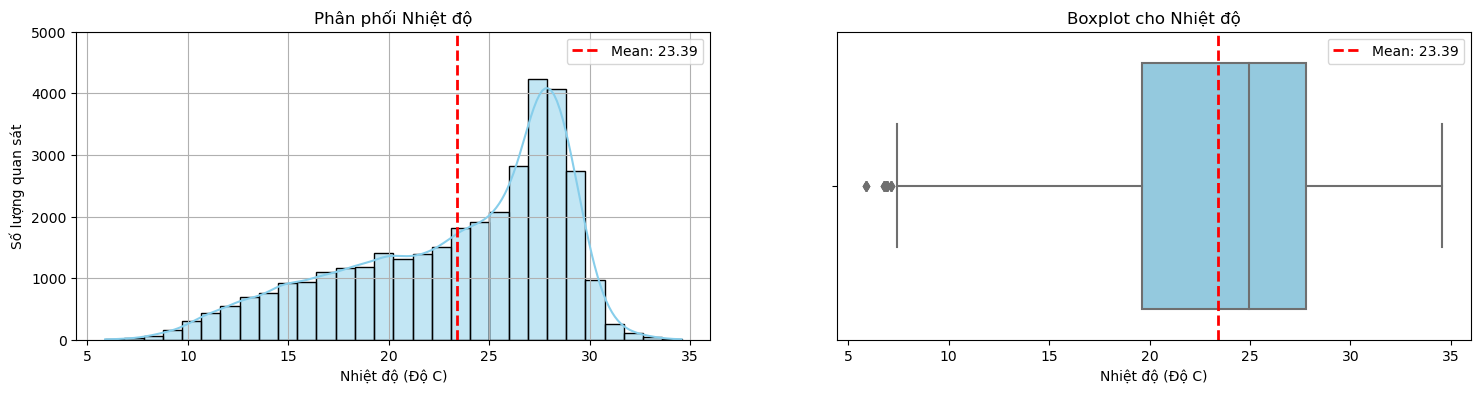

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ histogram và boxplot cho biến 'TS'
plt.figure(figsize=(18, 4))

# Biểu đồ histogram
plt.subplot(1, 2, 1)
sns.histplot(all_data_cleaned['TS'], bins=30, kde=True, color='skyblue')
plt.xlabel('Nhiệt độ (Độ C)')
plt.ylabel('Số lượng quan sát')
plt.title('Phân phối Nhiệt độ')
plt.grid(True)

# Đường mean
mean_value_rain = all_data_cleaned['TS'].mean()
plt.axvline(mean_value_rain, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_rain:.2f}')
plt.legend()

# Giới hạn giá trị trục y
plt.ylim(top=5000)

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=all_data_cleaned['TS'], color='skyblue')
plt.xlabel('Nhiệt độ (Độ C)')
plt.title('Boxplot cho Nhiệt độ')

# Đường mean
plt.axvline(mean_value_rain, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_rain:.2f}')
plt.legend()

plt.show()


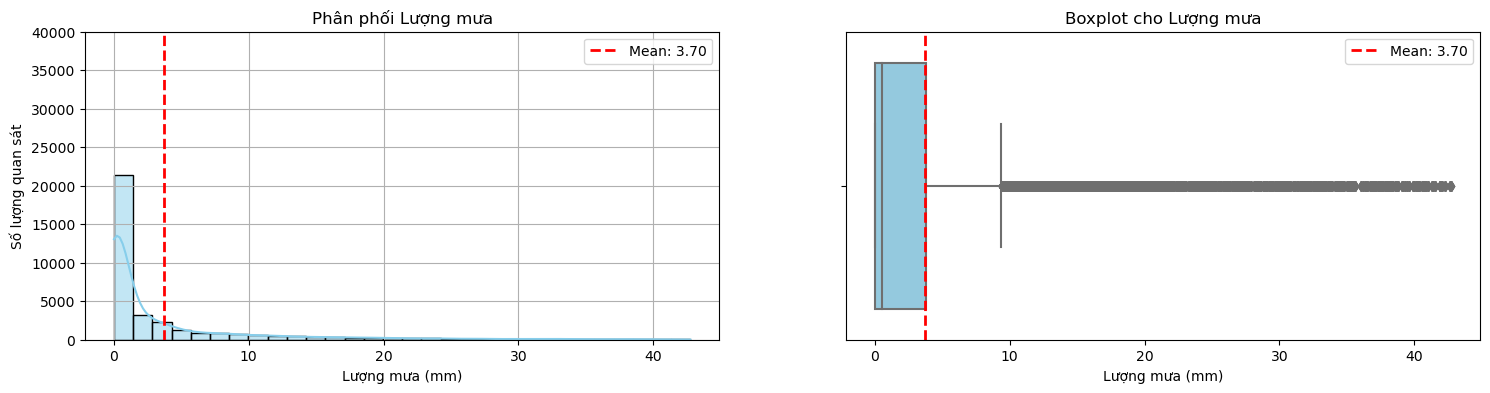

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ histogram và boxplot cho biến 'PRECTOTCORR'
plt.figure(figsize=(18, 4))

# Biểu đồ histogram
plt.subplot(1, 2, 1)
sns.histplot(all_data_cleaned['PRECTOTCORR'], bins=30, kde=True, color='skyblue')
plt.xlabel('Lượng mưa (mm)')
plt.ylabel('Số lượng quan sát')
plt.title('Phân phối Lượng mưa')
plt.grid(True)

# Đường mean
mean_value_rain = all_data_cleaned['PRECTOTCORR'].mean()
plt.axvline(mean_value_rain, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_rain:.2f}')
plt.legend()

# Giới hạn giá trị trục y
plt.ylim(top=40000)

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=all_data_cleaned['PRECTOTCORR'], color='skyblue')
plt.xlabel('Lượng mưa (mm)')
plt.title('Boxplot cho Lượng mưa')

# Đường mean
plt.axvline(mean_value_rain, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_rain:.2f}')
plt.legend()

plt.show()


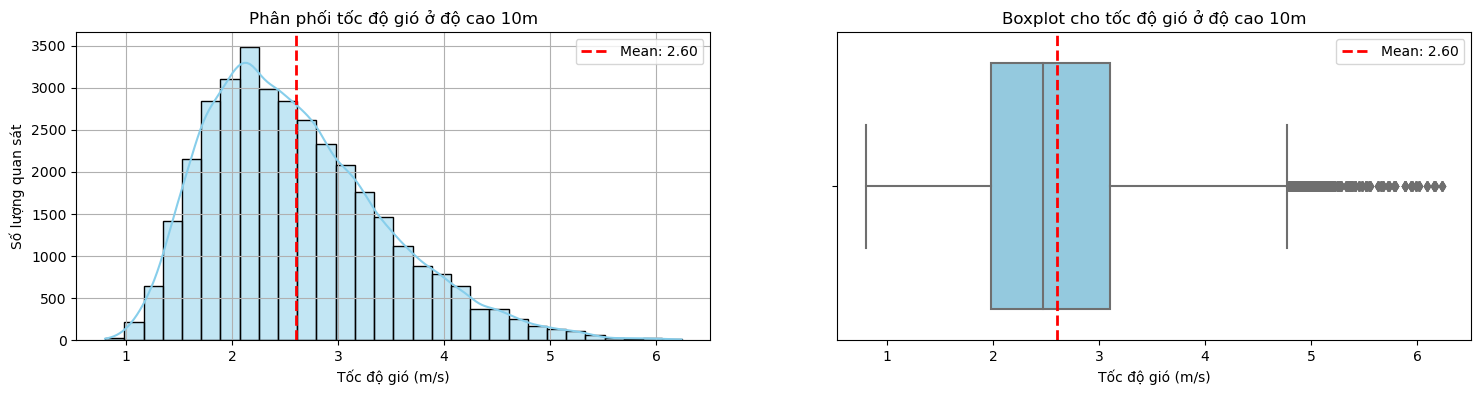

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ histogram và boxplot cho biến 'WS2M'
plt.figure(figsize=(18, 4))

# Biểu đồ histogram
plt.subplot(1, 2, 1)
sns.histplot(all_data_cleaned['WS10M'], bins=30, kde=True, color='skyblue')
plt.xlabel('Tốc độ gió (m/s)')
plt.ylabel('Số lượng quan sát')
plt.title('Phân phối tốc độ gió ở độ cao 10m')
plt.grid(True)

# Đường mean
mean_value = all_data_cleaned['WS10M'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=all_data_cleaned['WS10M'], color='skyblue')
plt.xlabel('Tốc độ gió (m/s)')
plt.title('Boxplot cho tốc độ gió ở độ cao 10m')

# Đường mean
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()

plt.show()


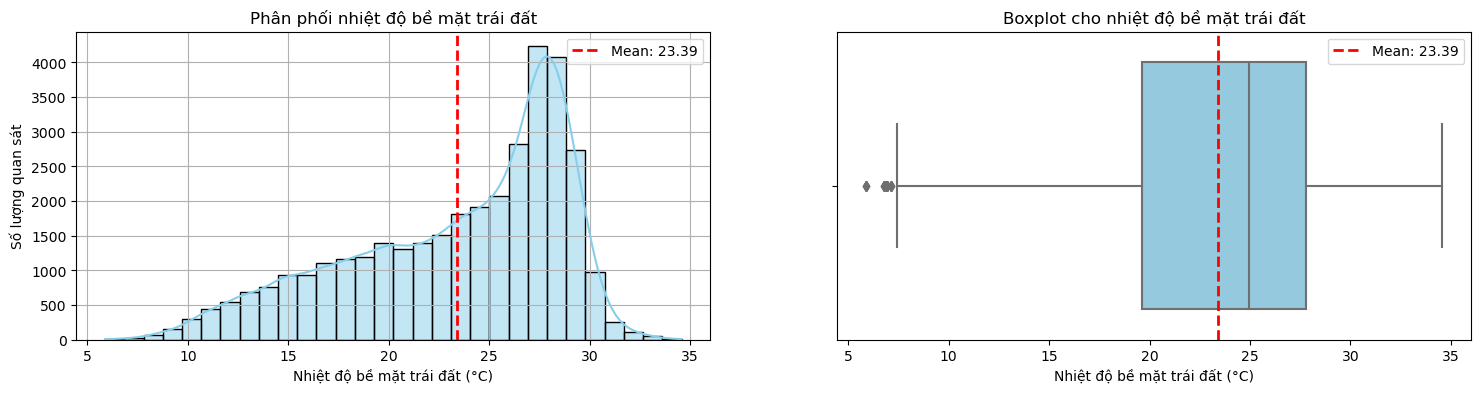

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ histogram và đường phân phối cho biến 'TS'
plt.figure(figsize=(18, 4))

# Biểu đồ histogram
plt.subplot(1, 2, 1)
sns.histplot(all_data_cleaned['TS'], bins=30, kde=True, color='skyblue')
plt.xlabel('Nhiệt độ bề mặt trái đất (°C)')
plt.ylabel('Số lượng quan sát')
plt.title('Phân phối nhiệt độ bề mặt trái đất')
plt.grid(True)

# Đường trung bình
mean_temperature = all_data_cleaned['TS'].mean()
plt.axvline(mean_temperature, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_temperature:.2f}')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=all_data_cleaned['TS'], color='skyblue')
plt.xlabel('Nhiệt độ bề mặt trái đất (°C)')
plt.title('Boxplot cho nhiệt độ bề mặt trái đất')

# Đường trung bình
plt.axvline(mean_temperature, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_temperature:.2f}')
plt.legend()

plt.show()


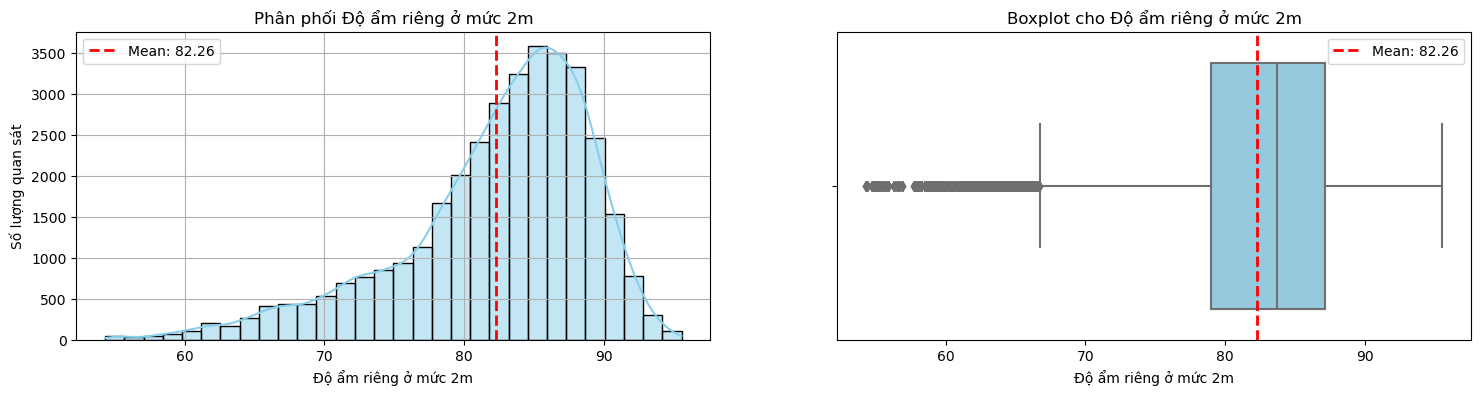

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ histogram và boxplot cho biến 'RH2M'
plt.figure(figsize=(18, 4))

# Biểu đồ histogram
plt.subplot(1, 2, 1)
sns.histplot(all_data_cleaned['RH2M'], bins=30, kde=True, color='skyblue')
plt.xlabel('Độ ẩm riêng ở mức 2m')
plt.ylabel('Số lượng quan sát')
plt.title('Phân phối Độ ẩm riêng ở mức 2m')
plt.grid(True)

# Đường mean
mean_value = all_data_cleaned['RH2M'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=all_data_cleaned['RH2M'], color='skyblue')
plt.xlabel('Độ ẩm riêng ở mức 2m')
plt.title('Boxplot cho Độ ẩm riêng ở mức 2m')

# Đường mean
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()

plt.show()


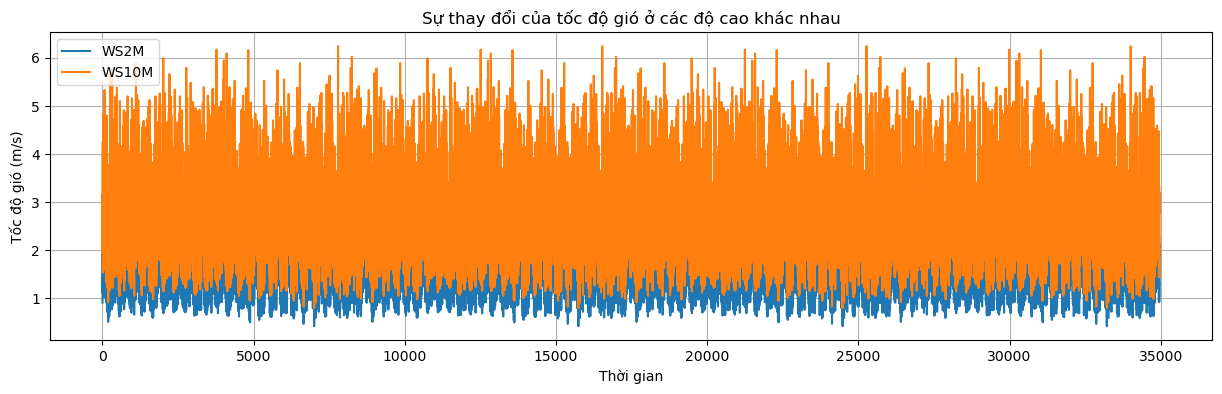

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo DataFrame mới cho việc vẽ biểu đồ đường
wind_speed_data = all_data_cleaned[['WS2M', 'WS10M']]

# Vẽ biểu đồ đường cho tốc độ gió ở các độ cao khác nhau
plt.figure(figsize=(15, 4))
sns.lineplot(data=wind_speed_data, dashes=False)

plt.xlabel('Thời gian')
plt.ylabel('Tốc độ gió (m/s)')
plt.title('Sự thay đổi của tốc độ gió ở các độ cao khác nhau')

plt.grid(True)
plt.show()


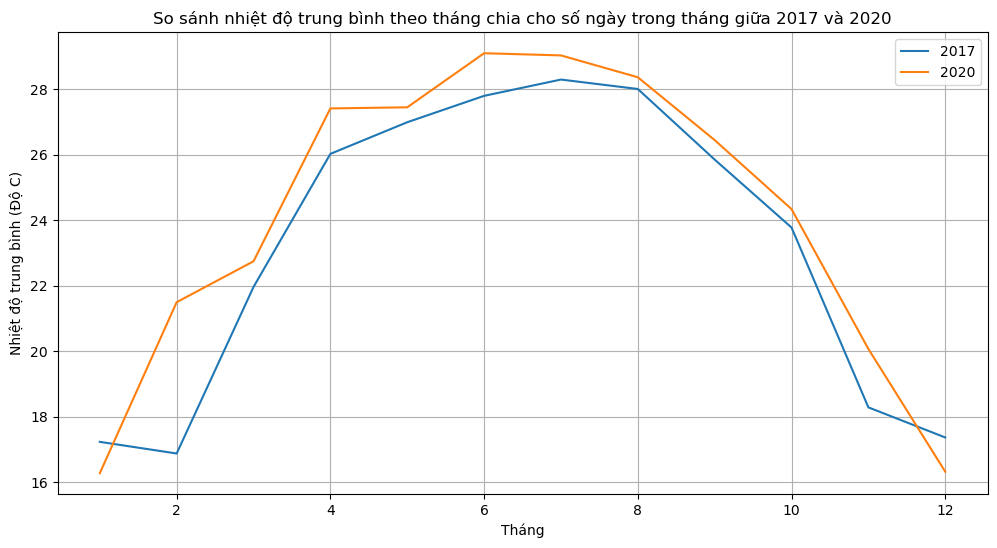

In [30]:
# Tạo bộ dữ liệu riêng cho năm 2017 và 2020
data_2017 = all_data_cleaned[all_data_cleaned['YEAR'] == 2000]
data_2020 = all_data_cleaned[all_data_cleaned['YEAR'] == 2019]

# Tính tổng nhiệt độ theo từng tháng cho cả hai năm
temperature_2017 = data_2017.groupby('MONTH')['TS'].sum() / data_2017.groupby('MONTH')['TS'].count()
temperature_2020 = data_2020.groupby('MONTH')['TS'].sum() / data_2020.groupby('MONTH')['TS'].count()

# Tạo biểu đồ so sánh
plt.figure(figsize=(12, 6))
plt.plot(temperature_2017.index, temperature_2017, label='2017')
plt.plot(temperature_2020.index, temperature_2020, label='2020')
plt.xlabel('Tháng')
plt.ylabel('Nhiệt độ trung bình (Độ C)')
plt.title('So sánh nhiệt độ trung bình theo tháng chia cho số ngày trong tháng giữa 2017 và 2020')
plt.legend()
plt.grid(True)
plt.show()


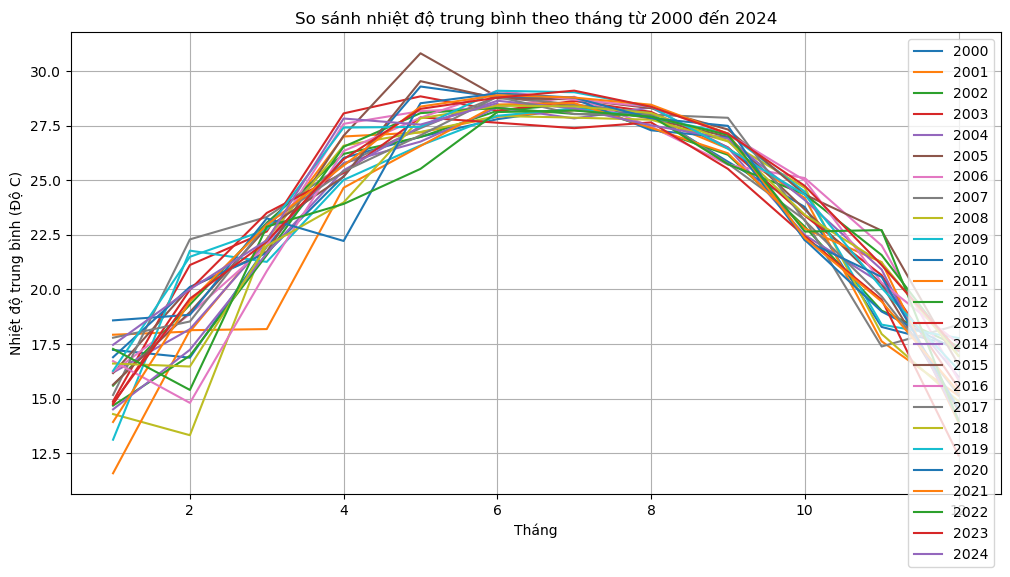

In [31]:
# Tính tổng nhiệt độ theo từng tháng cho tất cả các năm từ 2000 đến 2024
temperature_by_month = all_data_cleaned.groupby(['YEAR', 'MONTH'])['TS'].sum() / all_data_cleaned.groupby(['YEAR', 'MONTH'])['TS'].count()

# Tạo biểu đồ so sánh
plt.figure(figsize=(12, 6))
for year in range(2000, 2025):
    temperature_year = temperature_by_month.loc[year]
    plt.plot(temperature_year.index.get_level_values('MONTH'), temperature_year, label=str(year))

plt.xlabel('Tháng')
plt.ylabel('Nhiệt độ trung bình (Độ C)')
plt.title('So sánh nhiệt độ trung bình theo tháng từ 2000 đến 2024')
plt.legend()
plt.grid(True)
plt.show()


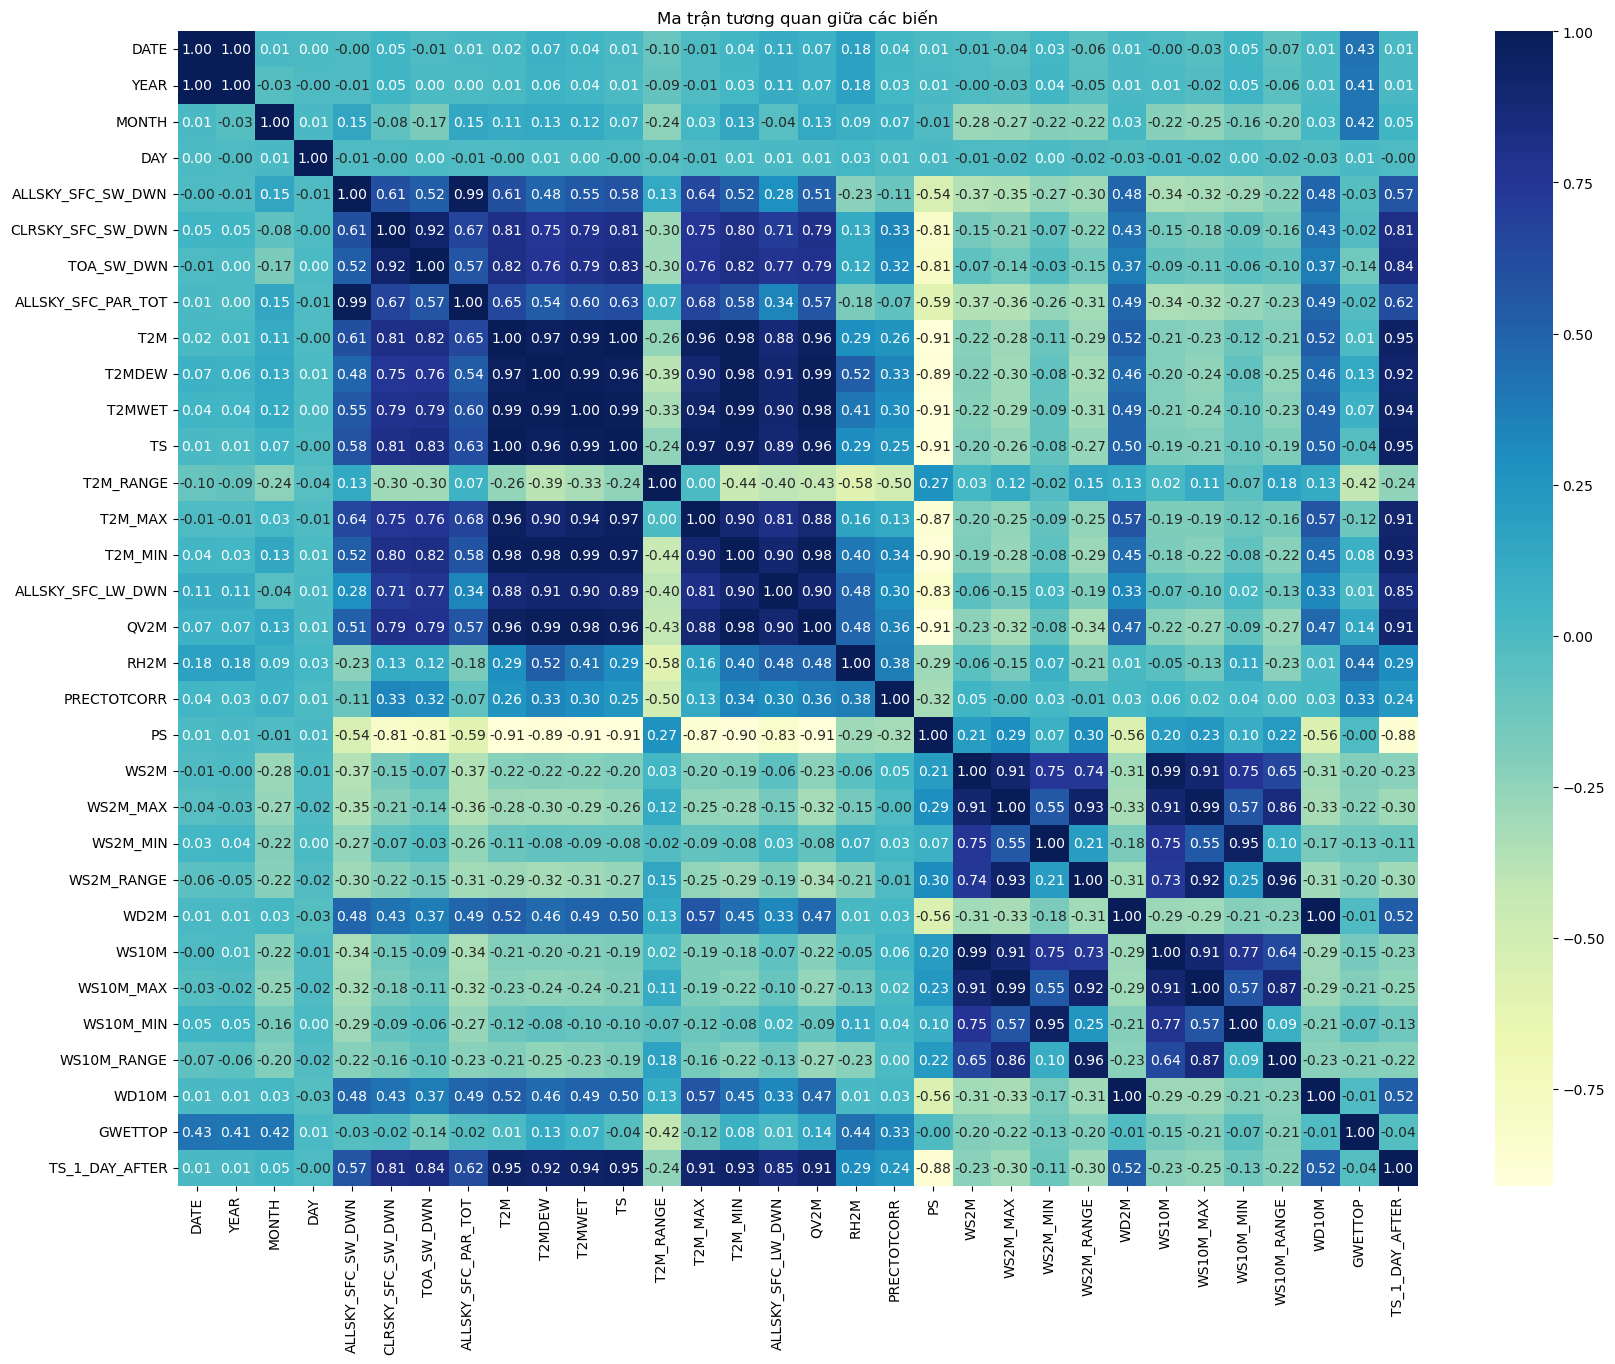

In [32]:
# Tính ma trận tương quan
correlation_matrix = all_data_cleaned.corr()

# Vẽ biểu đồ heatmap của ma trận tương quan
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Ma trận tương quan giữa các biến')
plt.show()
